In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Dogecoin and Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [2]:
base = 'https://api.coingecko.com/api/v3/'

In [3]:
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

In [4]:
result = requests.get(url)
j_bc = result.json()

In [6]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc.head(10)

,time,price
0,1558274570695,7874.016647
1,1558278174461,7913.198385
2,1558281677155,7944.556758
3,1558285247185,7911.711096
4,1558289001055,7952.021474
5,1558292561807,7971.505943
6,1558296178830,7961.077110
7,1558299759797,8000.155772
8,1558303209272,8048.505337
9,1558306818391,8113.687004


In [7]:
url = base + 'coins/dogecoin/market_chart'


In [8]:
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}


In [9]:
result = requests.get(url, params=param_dict)


In [10]:
j_dc = result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc.head(10)

,time,price
0,1558278150319,0.003131
1,1558281609356,0.003135
2,1558285208907,0.003161
3,1558288940759,0.003115
4,1558292408552,0.003112
5,1558296152748,0.003182
6,1558299734889,0.003177
7,1558303208250,0.003200
8,1558306814412,0.003160
9,1558310466845,0.003175


In [11]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')

In [12]:
df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2019-05-19 14:02:50.695,7874.016647
2019-05-19 15:02:54.461,7913.198385
2019-05-19 16:01:17.155,7944.556758
2019-05-19 17:00:47.185,7911.711096
2019-05-19 18:03:21.055,7952.021474
2019-05-19 19:02:41.807,7971.505943
2019-05-19 20:02:58.830,7961.077110
2019-05-19 21:02:39.797,8000.155772
2019-05-19 22:00:09.272,8048.505337


In [13]:
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')

df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2019-05-19 15:02:30.319,0.003131
2019-05-19 16:00:09.356,0.003135
2019-05-19 17:00:08.907,0.003161
2019-05-19 18:02:20.759,0.003115
2019-05-19 19:00:08.552,0.003112
2019-05-19 20:02:32.748,0.003182
2019-05-19 21:02:14.889,0.003177
2019-05-19 22:00:08.250,0.003200
2019-05-19 23:00:14.412,0.003160


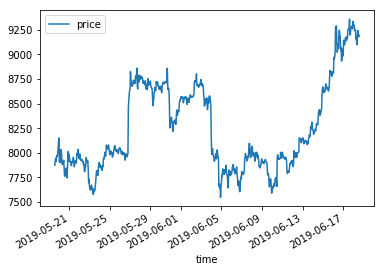

In [14]:
df_bc.plot()

In [18]:
!ls

Dogecoin_logo.png  solutions.ipynb     top_ten_report.json
main.ipynb	   top_ten_report.csv  Untitled.ipynb


![logo](Dogecoin_logo.png)

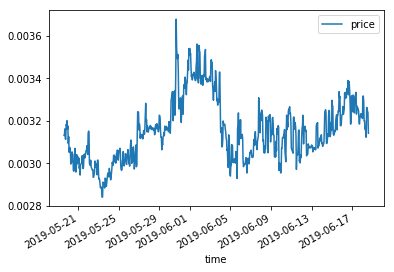

In [15]:
df_dc.plot()

# top ten coins report

In [16]:
url = base + 'coins/list'

In [17]:
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)

,id,name,symbol
0,01coin,01coin,zoc
1,02-token,O2 Token,o2t
2,0chain,0chain,zcn
3,0x,0x,zrx
4,0xcert,0xcert,zxc
5,10m-token,10M Token,10mt
6,1337,Elite,1337
7,1irstcoin,1irstcoin,fst
8,1million-token,1Million Token,1mt
9,1sg,1SG,1sg


In [25]:
data_df = df_list.iloc[:10, 0]
data_df

0            01coin
1          02-token
2            0chain
3                0x
4            0xcert
5         10m-token
6              1337
7         1irstcoin
8    1million-token
9               1sg
Name: id, dtype: object

In [26]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_series = pd.concat(data_list)
data_series

,date_time,price,file_name
0,1536969600000,0.009788,01coin
1,1537056000000,0.009883,01coin
2,1537142400000,0.012145,01coin
3,1537228800000,0.007965,01coin
4,1537315200000,0.011866,01coin
5,1537401600000,0.011457,01coin
6,1537488000000,0.009856,01coin
7,1537574400000,0.010346,01coin
8,1537660800000,0.012510,01coin
9,1537747200000,0.008730,01coin


In [27]:
data_df.set_index('date_time', inplace=True)

In [28]:
data_df.head()

,price,file_name
date_time,,
1546473600000,0.732939,1sg
1546560000000,0.732997,1sg
1546646400000,0.737224,1sg
1546732800000,0.703166,1sg
1546819200000,0.735154,1sg


In [30]:
data_df.to_csv('top_ten_report.csv')

In [31]:
!ls

Dogecoin_logo.png  solutions.ipynb     top_ten_report.json
main.ipynb	   top_ten_report.csv  Untitled.ipynb


In [32]:
check = pd.read_csv('top_ten_report.csv')
check

,date_time,price,file_name
0,1546473600000,0.732939,1sg
1,1546560000000,0.732997,1sg
2,1546646400000,0.737224,1sg
3,1546732800000,0.703166,1sg
4,1546819200000,0.735154,1sg
5,1546905600000,0.723909,1sg
6,1546992000000,0.731527,1sg
7,1547078400000,0.723053,1sg
8,1547164800000,0.736363,1sg
9,1547251200000,0.722752,1sg
